In [1]:
# ignore warnings
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
import wrangle
from acquire import get_zillow_data
# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

#Modeling Imports
from sklearn.model_selection import learning_curve
from sklearn.cluster import KMeans, dbscan
from sklearn.preprocessing import MinMaxScaler

pd.options.display.float_format = '{:20,.2f}'.format
pd.set_option('display.max_columns', 80)

In [2]:
df = wrangle.wrangle_zillow()

In [3]:
df = df.drop(columns=['parcelid', 'bathrooms', 'bedrooms', 'buildingquality', 'county','square_feet', 'lot_size', 'regionidcity',
       'regionidcounty', 'regionidzip', 'roomcnt', 'unit_count', 'assessmentyear', 'transactiondate', 'heating_system',
       'age_bin', 'taxrate',  'acres_bin', 'sqft_bin', 'structure_dollar_sqft_bin', 'lot_dollar_sqft_bin', 'bath_bed_ratio','tax_value_bin', 'land_tax_value_bin'])

In [4]:
X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle.data_split(df)

In [5]:
X_train.shape

(38835, 12)

In [6]:
# scale the data

# Make the scaler
scaler = MinMaxScaler()

# Fit the scaler
scaler.fit(X_train)

# Use the scaler
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_validate_scaled = pd.DataFrame(scaler.transform(X_validate), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
y_test = pd.DataFrame(y_test)

## <font color = 'red'> Cluster on All Columns

In [7]:
X = X_train_scaled

# Make the kmeans object
kmeans = KMeans(n_clusters=4)

# fit the kmeans model
kmeans.fit(X)

# use the thing
kmeans.predict(X)

array([0, 1, 0, ..., 2, 2, 2], dtype=int32)

In [8]:
X["cluster_all"] = kmeans.predict(X)

In [9]:
X.head()

,fips,latitude,longitude,age,structure_tax_value,tax_value,land_tax_value,taxamount,acres,structure_dollar_per_sqft,land_dollar_per_sqft,cola,cluster_all
0,0.00,0.59,0.67,0.46,0.06,0.18,0.18,0.15,0.01,0.11,0.06,0.00,0
1,0.00,0.56,0.52,0.37,0.04,0.06,0.05,0.05,0.03,0.07,0.01,1.00,1
2,0.00,0.45,0.53,0.32,0.03,0.08,0.08,0.07,0.01,0.10,0.02,0.00,0
3,0.00,0.51,0.58,0.45,0.04,0.03,0.01,0.03,0.01,0.03,0.00,1.00,1
4,0.00,0.59,0.65,0.44,0.02,0.02,0.01,0.01,0.01,0.03,0.00,0.00,0


In [10]:
X.cluster_all.value_counts()

0    15607
2    11097
1     8922
3     3209
Name: cluster_all, dtype: int64

In [11]:
cluster0 = X[X.cluster_all == 0]
cluster1 = X[X.cluster_all == 1]
cluster2 = X[X.cluster_all == 2]
cluster3 = X[X.cluster_all == 3]

In [12]:
cluster0.describe()

,fips,latitude,longitude,age,structure_tax_value,tax_value,land_tax_value,taxamount,acres,structure_dollar_per_sqft,land_dollar_per_sqft,cola,cluster_all
count,"15,607.00","15,607.00","15,607.00","15,607.00","15,607.00","15,607.00","15,607.00","15,607.00","15,607.00","15,607.00","15,607.00","15,607.00","15,607.00"
mean,0.00,0.52,0.69,0.36,0.05,0.08,0.06,0.07,0.04,0.07,0.02,0.00,0.00
std,0.00,0.18,0.11,0.17,0.05,0.08,0.07,0.06,0.10,0.04,0.03,0.00,0.00
min,0.00,0.00,0.30,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.38,0.61,0.23,0.03,0.03,0.01,0.03,0.01,0.05,0.00,0.00,0.00
50%,0.00,0.48,0.70,0.38,0.04,0.06,0.04,0.05,0.01,0.07,0.01,0.00,0.00
75%,0.00,0.56,0.75,0.47,0.06,0.09,0.07,0.08,0.02,0.09,0.03,0.00,0.00
max,0.30,1.00,0.96,1.00,0.92,0.95,1.00,0.76,1.00,1.00,0.73,0.00,0.00


In [13]:
cluster1.describe()

,fips,latitude,longitude,age,structure_tax_value,tax_value,land_tax_value,taxamount,acres,structure_dollar_per_sqft,land_dollar_per_sqft,cola,cluster_all
count,"8,922.00","8,922.00","8,922.00","8,922.00","8,922.00","8,922.00","8,922.00","8,922.00","8,922.00","8,922.00","8,922.00","8,922.00","8,922.00"
mean,0.00,0.53,0.56,0.41,0.06,0.10,0.08,0.09,0.04,0.08,0.02,1.00,1.00
std,0.00,0.08,0.06,0.18,0.07,0.11,0.09,0.09,0.10,0.06,0.03,0.00,0.00
min,0.00,0.25,0.42,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00
25%,0.00,0.48,0.51,0.27,0.03,0.04,0.02,0.04,0.01,0.05,0.00,1.00,1.00
50%,0.00,0.54,0.55,0.43,0.05,0.07,0.05,0.06,0.01,0.08,0.01,1.00,1.00
75%,0.00,0.59,0.61,0.51,0.07,0.12,0.10,0.10,0.02,0.10,0.03,1.00,1.00
max,0.00,0.67,0.69,0.95,0.95,1.00,0.99,1.00,0.91,0.75,0.81,1.00,1.00


In [14]:
cluster2.describe()

,fips,latitude,longitude,age,structure_tax_value,tax_value,land_tax_value,taxamount,acres,structure_dollar_per_sqft,land_dollar_per_sqft,cola,cluster_all
count,"11,097.00","11,097.00","11,097.00","11,097.00","11,097.00","11,097.00","11,097.00","11,097.00","11,097.00","11,097.00","11,097.00","11,097.00","11,097.00"
mean,0.30,0.25,0.87,0.27,0.06,0.10,0.08,0.08,0.01,0.07,0.04,0.00,2.00
std,0.01,0.08,0.07,0.13,0.06,0.09,0.08,0.07,0.01,0.04,0.05,0.00,0.00
min,0.00,0.00,0.56,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00
25%,0.30,0.19,0.81,0.18,0.03,0.05,0.03,0.04,0.01,0.05,0.01,0.00,2.00
50%,0.30,0.24,0.87,0.28,0.04,0.08,0.07,0.07,0.01,0.06,0.03,0.00,2.00
75%,0.30,0.32,0.93,0.37,0.07,0.13,0.11,0.10,0.01,0.09,0.05,0.00,2.00
max,0.30,0.41,1.00,0.83,1.00,1.00,0.97,0.81,0.21,0.92,1.00,0.00,2.00


In [15]:
cluster3.describe()

,fips,latitude,longitude,age,structure_tax_value,tax_value,land_tax_value,taxamount,acres,structure_dollar_per_sqft,land_dollar_per_sqft,cola,cluster_all
count,"3,209.00","3,209.00","3,209.00","3,209.00","3,209.00","3,209.00","3,209.00","3,209.00","3,209.00","3,209.00","3,209.00","3,209.00","3,209.00"
mean,1.00,0.61,0.26,0.27,0.07,0.09,0.06,0.07,0.01,0.08,0.02,0.00,3.00
std,0.00,0.04,0.10,0.13,0.05,0.07,0.05,0.05,0.03,0.03,0.03,0.00,0.00
min,1.00,0.48,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,3.00
25%,1.00,0.58,0.15,0.17,0.04,0.05,0.03,0.04,0.01,0.07,0.01,0.00,3.00
50%,1.00,0.61,0.28,0.27,0.06,0.08,0.05,0.06,0.01,0.08,0.02,0.00,3.00
75%,1.00,0.63,0.34,0.37,0.08,0.11,0.08,0.09,0.01,0.10,0.03,0.00,3.00
max,1.00,0.77,0.44,0.93,0.54,0.71,0.64,0.52,0.56,0.25,0.40,0.00,3.00


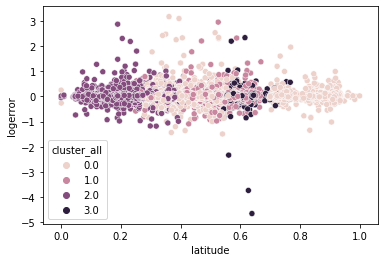

In [16]:
sns.scatterplot(x=X.latitude, y=y_train.logerror, hue=(X.cluster_all))

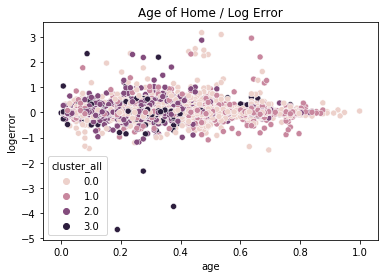

In [17]:
sns.scatterplot(x=X.age, y=y_train.logerror, hue=(X.cluster_all))
sns.color_palette("husl", 8)
plt.title('Age of Home / Log Error')
plt.show()

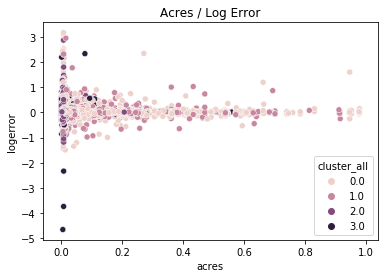

In [18]:
sns.scatterplot(x=X.acres, y=y_train.logerror, hue=(X.cluster_all))
sns.color_palette("husl", 8)
plt.title('Acres / Log Error')
plt.show()

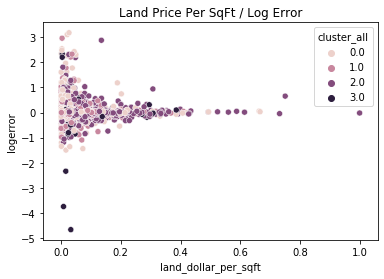

In [19]:
sns.scatterplot(x=X.land_dollar_per_sqft, y=y_train.logerror, hue=(X.cluster_all))
sns.color_palette("husl", 8)
plt.title('Land Price Per SqFt / Log Error')
plt.show()

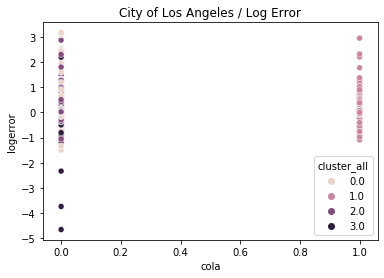

In [20]:
sns.scatterplot(x=X.cola, y=y_train.logerror, hue=(X.cluster_all))
sns.color_palette("husl", 8)
plt.title('City of Los Angeles / Log Error')
plt.show()

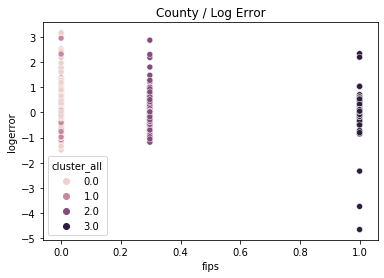

In [21]:
sns.scatterplot(x=X.fips, y=y_train.logerror, hue=(X.cluster_all))
sns.color_palette("husl", 8)
plt.title('County / Log Error')
plt.show()

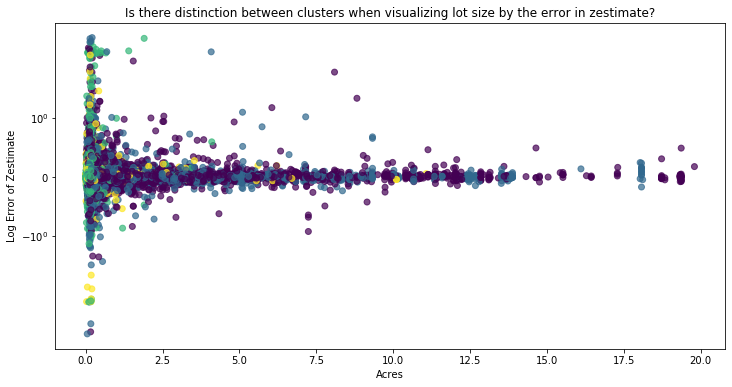

In [22]:
plt.figure(figsize=(12,6))
plt.scatter(y=y_train.logerror, x=X_train.acres, c=X.cluster_all, alpha=.7)
plt.yscale('symlog')
plt.xlabel('Acres')
plt.ylabel('Log Error of Zestimate')
plt.title('Is there distinction between clusters when visualizing lot size by the error in zestimate?')
plt.show()

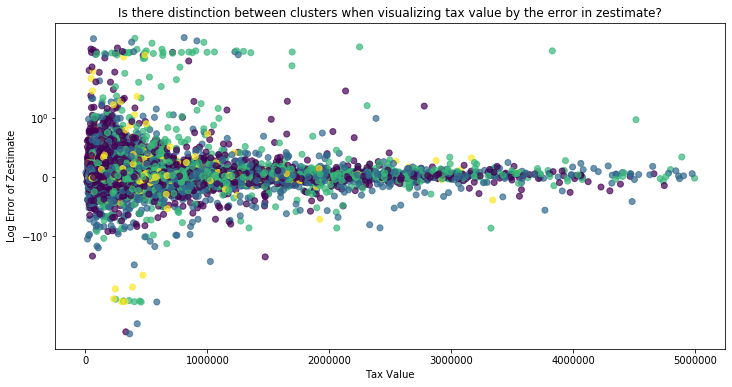

In [23]:
plt.figure(figsize=(12,6))
plt.scatter(y=y_train.logerror, x=X_train.tax_value, c=X.cluster_all, alpha=.7)
plt.yscale('symlog')
plt.xlabel('Tax Value')
plt.ylabel('Log Error of Zestimate')
plt.title('Is there distinction between clusters when visualizing tax value by the error in zestimate?')
plt.show()

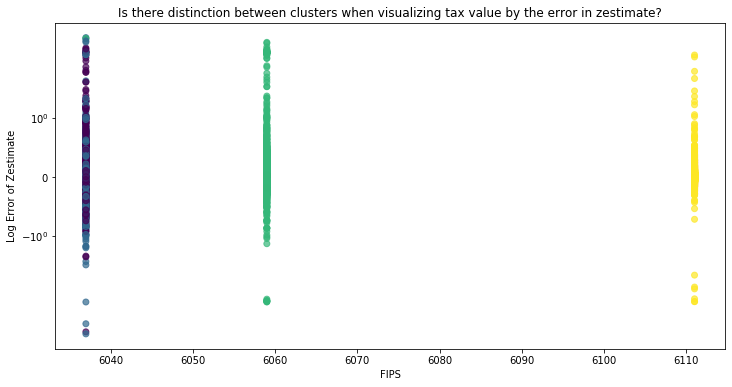

In [24]:
plt.figure(figsize=(12,6))
plt.scatter(y=y_train.logerror, x=X_train.fips, c=X.cluster_all, alpha=.7)
plt.yscale('symlog')
plt.xlabel('FIPS')
plt.ylabel('Log Error of Zestimate')
plt.title('Is there distinction between clusters when visualizing tax value by the error in zestimate?')
plt.show()

## <font color = 'red'> Cluster on Land Columns (size, cost, age)

In [25]:
X = X_train_scaled[['land_dollar_per_sqft', 'tax_value', 'age']]

# Make the kmeans object
kmeans = KMeans(n_clusters=5)

# fit the kmeans model
kmeans.fit(X)

# use the thing
kmeans.predict(X)

array([0, 0, 1, ..., 0, 1, 4], dtype=int32)

In [26]:
X_train_scaled.shape

(38835, 13)

In [27]:
X_train_scaled['cluster_sca'] = kmeans.predict(X)
kmeans.cluster_centers_

array([[0.02162947, 0.06866752, 0.43685642],
       [0.01858074, 0.07102884, 0.26382317],
       [0.12503936, 0.46621874, 0.28611856],
       [0.03309075, 0.08471854, 0.64656288],
       [0.03147437, 0.12707594, 0.108301  ]])

In [28]:
X_train_scaled.head(1)

,fips,latitude,longitude,age,structure_tax_value,tax_value,land_tax_value,taxamount,acres,structure_dollar_per_sqft,land_dollar_per_sqft,cola,cluster_all,cluster_sca
0,0.00,0.59,0.67,0.46,0.06,0.18,0.18,0.15,0.01,0.11,0.06,0.00,0,0


## <font color = 'red'> Cluster on Location Columns (latitude, longitude, cola, fips)

In [44]:
X = X_train_scaled[['latitude', 'longitude', 'cola', 'fips']]

# Make the kmeans object
kmeans = KMeans(n_clusters=3)

# fit the kmeans model
kmeans.fit(X)

# use the thing
kmeans.predict(X)

array([1, 0, 1, ..., 1, 1, 1], dtype=int32)

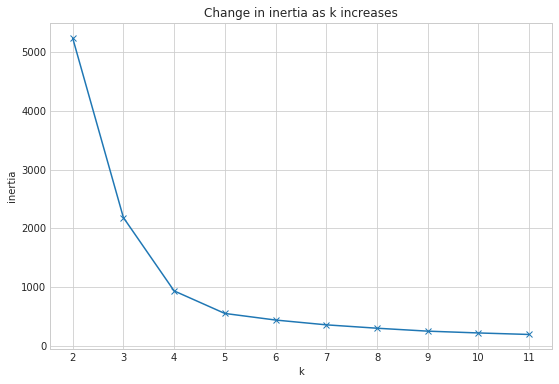

In [45]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [46]:
X_train_scaled['cluster_location'] = kmeans.predict(X)

In [47]:
kmeans.cluster_centers_

array([[5.26848990e-01, 5.55974354e-01, 1.00000000e+00, 7.32747196e-15],
       [4.04082771e-01, 7.63292616e-01, 1.42386103e-14, 1.23343198e-01],
       [6.11928149e-01, 2.58832116e-01, 2.77555756e-17, 1.00000000e+00]])

In [ ]:
plt.figure(figsize=(12,6))
sns.jointplot(X_train_scaled.cluster_location, y_train.logerror, kind='reg', height=10, hue=X_train_scaled.cluster_location);
#plt.yscale('symlog')
#plt.xlabel('latitude')
#plt.ylabel('Log Error of Zestimate')
#plt.title('Is there distinction between clusters when visualizing latitude by the error in zestimate?')
#plt.legend()
plt.show()

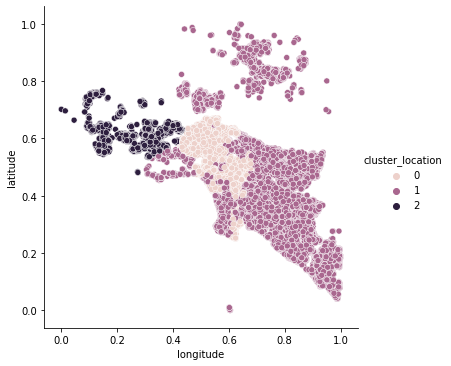

In [57]:
sns.relplot(x="longitude", y="latitude", hue="cluster_location", data=X_train_scaled)

## <font color = 'red'> Cluster on Tax (structure_tax_value, land_tax_value, taxamount)

In [33]:
X = X_train_scaled[['structure_tax_value', 'land_tax_value', 'taxamount']]

# Make the kmeans object
kmeans = KMeans(n_clusters=5)

# fit the kmeans model
kmeans.fit(X)

# use the thing
kmeans.predict(X)

array([4, 1, 2, ..., 2, 2, 1], dtype=int32)

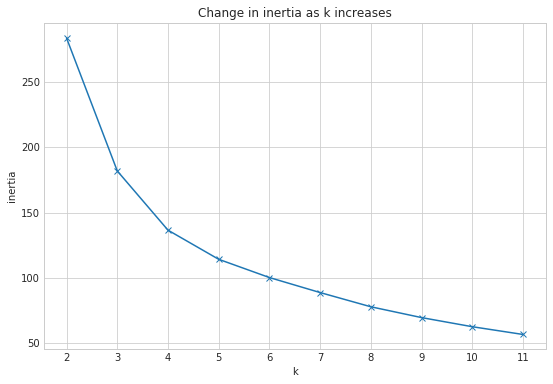

In [34]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [35]:
X_train_scaled['cluster_tax'] = kmeans.predict(X)

In [36]:
kmeans.cluster_centers_

array([[0.1913843 , 0.28399327, 0.28194188],
       [0.03232272, 0.02257279, 0.0348733 ],
       [0.05701212, 0.07595908, 0.08111836],
       [0.34025813, 0.53194844, 0.52077188],
       [0.10598078, 0.14553903, 0.15139901]])

In [37]:
X_train_scaled.head(1)

,fips,latitude,longitude,age,structure_tax_value,tax_value,land_tax_value,taxamount,acres,structure_dollar_per_sqft,land_dollar_per_sqft,cola,cluster_all,cluster_sca,cluster_location,cluster_tax
0,0.00,0.59,0.67,0.46,0.06,0.18,0.18,0.15,0.01,0.11,0.06,0.00,0,0,0,4


 ## <font color = 'red'> Cluster on Misc (age, acres, structure_dollar_per_sqft)

In [38]:
X = X_train_scaled[['age', 'acres', 'structure_dollar_per_sqft']]

# Make the kmeans object
kmeans = KMeans(n_clusters=5)

# fit the kmeans model
kmeans.fit(X)

# use the thing
kmeans.predict(X)

array([0, 0, 1, ..., 0, 1, 4], dtype=int32)

In [39]:
X_train_scaled['cluster_misc'] = kmeans.predict(X)

In [40]:
kmeans.cluster_centers_

array([[0.43483744, 0.01079424, 0.05915355],
       [0.2619378 , 0.02700207, 0.07823682],
       [0.64292245, 0.00820344, 0.06575837],
       [0.27412406, 0.44407922, 0.08981219],
       [0.10477953, 0.01644738, 0.11109808]])

In [65]:
X_train_scaled.head(1)

,fips,latitude,longitude,age,structure_tax_value,tax_value,land_tax_value,taxamount,acres,structure_dollar_per_sqft,land_dollar_per_sqft,cola,cluster_all,cluster_sca,cluster_location,cluster_tax,cluster_misc
0,0.00,0.59,0.67,0.46,0.06,0.18,0.18,0.15,0.01,0.11,0.06,0.00,0,0,1,4,0


In [69]:
clusters= X_train_scaled[['cluster_all','cluster_sca','cluster_location', 'cluster_tax', 'cluster_misc']]
clusters.head(3)

,cluster_all,cluster_sca,cluster_location,cluster_tax,cluster_misc
0,0,0,1,4,0
1,1,0,0,1,0
2,0,1,1,2,1


# Modeling

In [72]:
# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

### Creating a Baseline

In [89]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
y_test= pd.DataFrame(y_test)
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38835 entries, 31706 to 64385
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   logerror              38835 non-null  float64
 1   logerror_pred_median  38835 non-null  float64
 2   logerror_pred_mean    38835 non-null  float64
dtypes: float64(3)
memory usage: 2.4 MB


In [85]:

# 1. Predict logerror_mean
logerror_pred_mean = y_train.logerror.mean()
y_train['logerror_pred_mean'] = logerror_pred_mean
y_validate['logerror_pred_mean'] = logerror_pred_mean

# 2. compute logerror_logerrorpred_median
logerror_pred_median = y_train.logerror.median()
y_train['logerror_pred_median'] = logerror_pred_median
y_validate['logerror_pred_median'] = logerror_pred_median

# 3. RMSE of tax_pred_mean
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_mean) ** (1/2)
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_mean) ** (1/2)

print("RMSE using Mean\nTrain/In-Sample: ", rmse_train, 
      "\nValidate/Out-of-Sample: ", rmse_validate)

# 4. RMSE of tax_pred_median
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_median) ** (1/2)
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_median) ** (1/2)
print("RMSE using Median\nTrain/In-Sample: ", rmse_train, 
      "\nValidate/Out-of-Sample: ", rmse_validate)

RMSE using Mean
Train/In-Sample:  2.4980018054066022e-15 
Validate/Out-of-Sample:  2.4980018054066022e-15
RMSE using Median
Train/In-Sample:  0.0 
Validate/Out-of-Sample:  0.0


In [87]:
metric_df = pd.DataFrame(data=[{
    'model': 'mean_baseline', 
    'RMSE_validate': rmse_validate,
    'r^2_validate': explained_variance_score(y_validate.logerror, y_validate.logerror_pred_mean)}])

NameError: name 'explained_variance_score' is not defined